# NEOs and PHAs Classify using Grandient Booting Classifier

## 1. Data

We use the dataset of "Orbits for all asteroids in the MPC database" from the Minor Planet Center to train and test the model [http://www.minorplanetcenter.net/data]

Dataset Description:
    
    - Total number of columns: 37
    
    - Total number of usage features: 16
    
    - Number of classes: 3 
        + Potentially Hazardous Asteroids(PHAs) - Label(2): 1671 records
        + Near Earth Objects(NEOs) - Label(1): 12509 records
        + Others - Label(0): 699401 records


In [4]:
import pandas as pd

TRAINING_FILE = 'mpcorb_extended.json'

TRAINING_HEADER = [
    'Num_obs',
    'Synodic_period',
    'Aphelion_dist',
    'Node',
    'H',
    'rms',
    'n',
    'Num_opps',
    'Orbital_period',
    'Peri',
    "G",
    "e",
    "Epoch",
    "Semilatus_rectum",
    "i",
    "a",
]

IGNORE_HEADER = [
    "Name",
    "Perturbers_2",
    "Ref",
    "NEO_flag",
    "Perturbers",
    "Computer",
    "Number",
    "One_km_NEO_flag",
    "PHA_flag",
    "Principal_desig",
    "Arc_years",
    "Last_obs",
    "Hex_flags",
    "Other_desigs",
    "U"
]


# read training file
df = pd.read_json(TRAINING_FILE)
# replace NaN value by 0
df.fillna(0, inplace=True)

### get label ###
label_NEO_flag = df['NEO_flag']
label_PHA = df['PHA_flag']

label = label_NEO_flag + label_PHA

# remove ignore header
df.drop(IGNORE_HEADER, axis=1, inplace=True)
### get data ###
data = df



## 2. Gradient Boosting Classifier

"Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function..." [Wikipedia]

We use the implementation of GradientBoostingClassifier from the Scikit-learn toolkit.

The dataset is splited into 70% for training and 30% for testing. 

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

# fit estimator
multi_classifier = GradientBoostingClassifier(n_estimators=200, max_depth=3)
multi_classifier.fit(X_train, y_train)



GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [8]:
# predict class labels
y_pred = multi_classifier.predict(X_test)

# score on test data (accuracy)
accuracy = multi_classifier.score(X_test, y_test)
print('ACC: %.5f' % accuracy)

# predict class probabilities

print ('F1-Score for each class:')
print f1_score(y_test, y_pred, average = None)


ACC: 0.99851
F1-Score for each class:
[ 0.99997856  0.95815789  0.635183  ]


Result:
    - Total Accuracy: 0.99851
    - F1-Score for each class:
        + PHAs: 0.99998
        + NEOs: 0.95816
        + Others: 0.63518

We also show the chart of important feartures extracted from the training data: 

Populating the interactive namespace from numpy and matplotlib


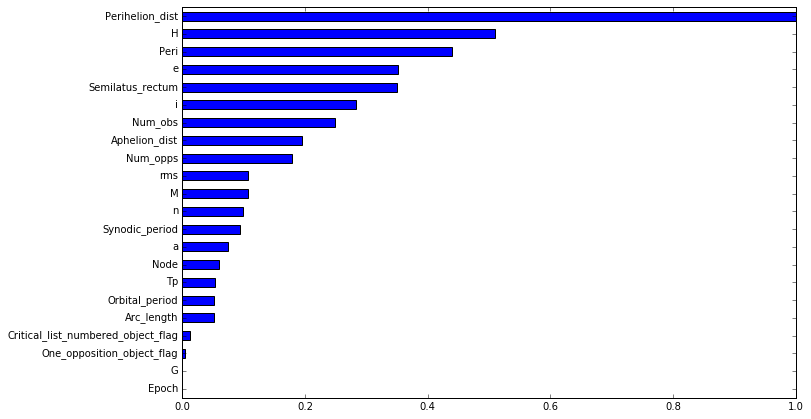

In [11]:
%pylab inline

# Important features visualization
names = df.columns.values
fx_imp = pd.Series(multi_classifier.feature_importances_, index=names)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort_values(inplace=True)
fx_imp.plot(kind='barh', figsize=(11,7))
